# Exploración quantitativa de analisis de datos
## Percentiles, Outliers y box plot
### Adrián Vázquez 
#### 17/05/21

#### <b> Calculando percentiles </b>


In [5]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
iris_df = pd.read_csv('datos/Iris.csv')

print(iris_df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [27]:
versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor']
versicolor_petal_lenght = versicolor['PetalLengthCm']

versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor']
versicolor_petal_width = versicolor['PetalWidthCm']

In [10]:
#Especificando un arreglo especifico de percentiles
percentiles = np.array([2.5,25,50,75,97.5])

#declaramos una variable donde calcular los percentiles de versiversicolor_petal_lenght especificando que quremos 
# los que previamente ya habiamos especificado 
percentiles_versicolor = np.percentile(versicolor_petal_lenght,percentiles)

print(percentiles_versicolor)

[3.3    4.     4.35   4.6    4.9775]


<b> Comparando percentiles con ECDF </b>
 - Veremos como se relacionan los percentiles con nuestro ECDF
 - Hay que tomar en cuenta que para asegurar que el eje y del grafico ECDF permanezca entre 0 y 1 tendremos que rescalar la matriz de percentiles de consecuencia. En este caso, dividiéndola por 100
    

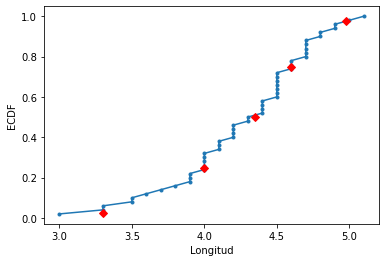

In [13]:
# Función para calcular un ECDF: devuelve x y y del ECDF
import numpy as np 
def ecdf(datos): 
    n = len(datos) #<------ Numero de puntos de datos
    x = np.sort(datos) #<----- ordena los datos 
    y = np.arange(1, len(x) + 1)/n #<------ datos especificamos uniformemente con maximo de uno 
    return x, y  #<--------- Regresar valores para x y y

# calculando el ECDF para veriscolor data
x_vers, y_vers = ecdf(versicolor_petal_lenght)
    
plt.plot(x_vers, y_vers, marker = '.')
_ = plt.xlabel('Longitud')
_ = plt.ylabel('ECDF')

plt.plot(percentiles_versicolor, percentiles/100, marker = 'D', color = 'red', linestyle = 'none')

plt.show()

### <b> Box plot con Seaborn </b>

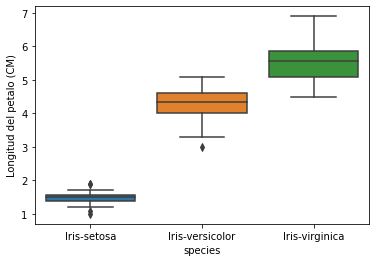

In [21]:
import seaborn as sns
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris_df )

_ = plt.xlabel('species')
_ = plt.ylabel('Longitud del petalo (CM)')
plt.show()

#### <b> Calculando la varianza </b>

- Calculando la varianza de forma manual 

 ## $  \sigma{(x)^2} = \frac{ 
\sum_{1}^{n}(x_{i}-\bar{x})^2
}{N}  $

In [24]:
#calculamos la diferencia entre versversicolor_petal_lenght y su media 

diferencia = versicolor_petal_lenght - np.mean(versicolor_petal_lenght)

#Obtenemos el cuadrado de la diferencia
dif_cuadrado = diferencia**2

# Obtenemos la raiz media
dif_media = np.mean(dif_cuadrado)

#calculamos con  el metodo np.variance 
varianza = np.var(versicolor_petal_lenght)

#vemos que es el mismo resultado
print(dif_media, varianza)

0.21640000000000012 0.21640000000000012


### <b> Desviación estandar</b>

 - La desviación estandar es la raiz cuadrada de la varianza
 
 
 ## $  \sigma{(x)} = \sqrt{\frac{ 
\sum_{1}^{n}(x_{i}-\bar{x})^2
}{N}}  $

In [26]:
#comprobando 
#utilizando los calculos anteriores, especificamente la variable variable
# y obteniendo su raiz
print(np.sqrt(varianza))

#utilizando el metodo np.std
print(np.std(versicolor_petal_lenght))
# Podemos comprobar que son lo mismo 

0.4651881339845204
0.4651881339845204


### <b> Covarianza y Coeficiente de correlación de Pearson </b> 

- En los ejercicios anteriores se han utilizado graficos de caja, enjambre de abejas y ECDF, comparando longitudes diferentes entre distintas especies de iris. 
- ¿pero si quieres comparar dos propiedades de una sola especie? Utilizando un grafico de dispersión 
- un grafico de dispersión de las medidas de longitud y ancura de los petalos de las flores de iris versicolor. si la flor escala (es decir, conserva su proporción a medida que crece) Esperariamos que la longitud y la anchura estuvieran correlacionadas. 

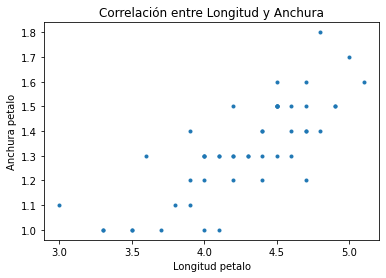

In [30]:
_ = plt.plot(versicolor_petal_lenght, versicolor_petal_width, marker = '.', linestyle = 'none')
_ = plt.xlabel('Longitud petalo')
_ = plt.ylabel('Anchura petalo')
plt.title('Correlación entre Longitud y Anchura')

plt.show()

### <b> Calculando la covarianza </b>

 ## $ S_{xy} =  cov(x,y) = {\frac{ 
\sum_{1}^{n}(x_{i}-\bar{x})((y_{i}-\bar{y})
}{N}}  $

- La covarianza puede calcularse utilizando el metodo np.cov 

- Teniendo dos conjuntos de datos x y y np.cov(x,y) devuelve una matriz 2D donde las entradas [0,1] y [1,0] son covarianzas. La entrada [0,0] es la varianza de los datos de x y la entrada [1,1] es la varianza de los datos en y.  

In [34]:
# calculando la covarianza con el metodo np.cov

covarianza = np.cov(versicolor_petal_lenght, versicolor_petal_width)

print(covarianza)

#Extraer la covarianza de la longitud y la anchura del petalo 

petalo_cov = covarianza[0,1]
print(petalo_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### <b> coeficiente de correlación de Pearson  </b>

 ## $ \rho = r = \frac{S_{xy}}{\sigma{(x)}\sigma{(y)}}  $

 - el coeficiente de correlación de Pearson, también llamado r de Pearson, suele ser más fácil de interpretar que la covarianza. Se calcula con la función np.corrcoef(). Al igual que np.cov(), toma dos matrices como argumentos y devuelve una matriz 2D. Las entradas [0,0] y [1,1] son necesariamente iguales a 1 (¿puedes pensar por qué?), y el valor que buscamos es la entrada [0,1].

In [35]:
# Función para devolver la entrada [0,1]
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_width, versicolor_petal_lenght)

print(r)

0.7866680885228169
